Author: Jurat Shayiding

Objective: In this report, I'd like to investigate the relationshio between crime occured frequencies and house sale price flucation in Chicago area. We are going to build up machine learning model that able to capture the relationship between crime frequencies and its effect on real eastate business in Chicago.

In [ ]:
## preprocessing on Chicago Crime data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime
from scipy import stats
import seaborn as sns
import re

crimes_2012 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=',', error_bad_lines=False)
crimes_2012.drop_duplicates(subset=['ID', 'Case Number', 'Date'], inplace=True)
crimes_2012.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On',
                  'X Coordinate','Y Coordinate'], inplace = True, axis = 1)
crimes_2012 = crimes_2012.dropna(axis = 0, how = 'any')

## date conversion
crimes_2012.Date = pd.to_datetime(crimes_2012.Date, format = '%m/%d/%Y %I:%M:%S %p')
crimes_2012['Primary Type'] = pd.Categorical(crimes_2012['Primary Type'])
crimes_2012['Description'] = pd.Categorical(crimes_2012['Description'])
crimes_2012['Location Description'] = pd.Categorical(crimes_2012['Location Description'])
crimes_2012['Primary Type']=crimes_2012['Primary Type'].apply(lambda x: re.sub(' ', '_', str(x)).lower())

since in Chicago crime data, concrete name of crime occured area are not given, we are going to assign community name to Chicago crime data for the sake of easier intergration with real estate data. Here is list of community name that going to be introduced to crime data.

In [3]:
### community area name
area_names = """
01	Rogers Park	
40	Washington Park
02	West Ridge	
41	Hyde Park
03	Uptown	
42	Woodlawn
04	Lincoln Square	
43	South Shore
05	North Center	
44	Chatham
06	Lakeview	
45	Avalon Park
07	Lincoln Park	
46	South Chicago
08	Near North Side	
47	Burnside
09	Edison Park	
48	Calumet Heights
10	Norwood Park	
49	Roseland
11	Jefferson Park	
50	Pullman
12	Forest Glen	
51	South Deering
13	North Park	
52	East Side
14	Albany Park	
53	West Pullman
15	Portage Park	
54	Riverdale
16	Irving Park	
55	Hegewisch
17	Dunning	
56	Garfield Ridge
18	Montclare	
57	Archer Heights
19	Belmont Cragin	
58	Brighton Park
20	Hermosa	
59	McKinley Park
21	Avondale	
60	Bridgeport
22	Logan Square	
61	New City
23	Humboldt Park	
62	West Elsdon
24	West Town	
63	Gage Park
25	Austin	
64	Clearing
26	West Garfield Park 	
65	West Lawn
27	East Garfield Park	
66	Chicago Lawn
28	Near West Side	
67	West Englewood
29	North Lawndale	
68	Englewood
30	South Lawndale	
69	Greater Grand Crossing
31	Lower West Side	
70	Ashburn
32	Loop	
71	Auburn Gresham	
33	Near South Side	
72	Beverly
34	Armour Square	
73	Washington Heights
35	Douglas	
74	Mount Greenwood
36	Oakland	
75	Morgan Park
37	Fuller Park	
76	O'Hare
38	Grand Boulevard	
77	Edgewater
39	Kenwood	
"""

In [4]:
## neighborhood : community name
neighborhood_Map = """
Cabrini–Green	Near North Side	
The Gold Coast	Near North Side	
Goose Island	Near North Side	
Magnificent Mile	Near North Side	
Old Town	Near North Side	
River North	Near North Side	
River West	Near North Side	
Streeterville	Near North Side	
Loop	Loop	
Near East Side	Loop	
South Loop	Loop	
West Loop Gate	Loop	
Dearborn Park	Near South Side	
Printer's Row	Near South Side	
South Loop	Near South Side	
Prairie Avenue Historic District	Near South Side	
Horner Park	North Center	
Roscoe Village	North Center	
Boystown	Lake View	
Lake View East	Lake View	
Graceland West	Lake View	
South East Ravenswood	Lake View	
Wrigleyville	Lake View	
Old Town Triangle	Lincoln Park	
Park West	Lincoln Park	
Ranch Triangle	Lincoln Park	
Sheffield Neighbors	Lincoln Park	
Wrightwood Neighbors	Lincoln Park	
Belmont Gardens	Avondale	
Chicago's Polish Village	Avondale	
Kosciuszko Park	Avondale	
Belmont Gardens	Logan Square	
Bucktown	Logan Square	
Kosciuszko Park	Logan Square	
Palmer Square	Logan Square	
East Rogers Park	Rogers Park	
Arcadia Terrace	West Ridge	
Peterson Park	West Ridge	
West Rogers Park	West Ridge	
Buena Park	Uptown	
Argyle Street	Uptown	
Margate Park	Uptown	
Sheridan Park	Uptown	
Ravenswood	Lincoln Square	
Ravenswood Gardens	Lincoln Square	
Rockwell Crossing	Lincoln Square	
Edison Park	Edison Park	
Big Oaks	Norwood Park	
Old Norwood Park	Norwood Park	
Oriole Park	Norwood Park	
Union Ridge	Norwood Park	
Gladstone Park	Jefferson Park	
Edgebrook	Forest Glen	
Old Edgebrook	Forest Glen	
South Edgebrook	Forest Glen	
Sauganash	Forest Glen	
Wildwood	Forest Glen	
Brynford Park	North Park	
Hollywood Park	North Park	
River's Edge	North Park	
Sauganash Woods	North Park	
Mayfair	Albany Park	
North Mayfair	Albany Park	
Ravenswood Manor	Albany Park	
Schorsch Forest View	O'Hare	
Andersonville	Edgewater	
Edgewater Beach	Edgewater	
Magnolia Glen	Edgewater	
Lakewood/Balmoral	Edgewater	
Belmont Central	Portage Park	
Władysławowo	Portage Park	
Six Corners	Portage Park	
Avondale Gardens	Irving Park	
Independence Park	Irving Park	
Kilbourn Park	Irving Park	
Little Cassubia	Irving Park	
Old Irving Park	Irving Park	
West Walker	Irving Park	
The Villa	Irving Park	
Belmont Heights	Dunning	
Belmont Terrace	Dunning	
Irving Woods	Dunning	
Schorsch Village	Dunning	
Montclare	Montclare	
Belmont Central	Belmont Cragin	
Hanson Park	Belmont Cragin	
Belmont Gardens	Hermosa	
Kelvyn Park	Hermosa	
East Village	West Town	
Noble Square	West Town	
Polish Downtown	West Town	
Pulaski Park	West Town	
Smith Park	West Town	
Ukrainian Village	West Town	
Wicker Park	West Town	
Galewood	Austin	
The Island	Austin	
West Garfield Park	West Garfield Park	
Fifth City	East Garfield Park	
Greektown	Near West Side	
Little Italy	Near West Side	
Tri-Taylor	Near West Side	
Lawndale	North Lawndale	
Homan Square	North Lawndale	
Douglas Park	North Lawndale	
Little Village	South Lawndale	
Heart of Chicago	Lower West Side	
Heart of Italy	Lower West Side	
Pilsen	Lower West Side	
East Pilsen	Lower West Side	
Chinatown	Armour Square	
Wentworth Gardens	Armour Square	
Bridgeport, Chicago	Armour Square	
Groveland Park	Douglas	
Lake Meadows	Douglas	
the Gap	Douglas	
Prairie Shores	Douglas	
South Commons	Douglas	
Oakland	Oakland	
Fuller Park	Fuller Park	
Bronzeville	Grand Boulevard	
Kenwood	Kenwood	
South Kenwood	Kenwood	
Washington Park	Washington Park	
East Hyde Park	Hyde Park	
Hyde Park	Hyde Park	
West Woodlawn	Woodlawn	
Jackson Park Highlands	South Shore	
Bridgeport	Bridgeport	
Grand Crossing	Greater Grand Crossing	
Parkway Gardens	Greater Grand Crossing	
Park Manor	Greater Grand Crossing	
LeClaire Courts	Garfield Ridge	
Sleepy Hollow	Garfield Ridge	
Vittum Park	Garfield Ridge	
Archer Heights	Archer Heights	
Brighton Park	Brighton Park	
McKinley Park 	McKinley Park	
Back of the Yards	New City	
Canaryville	New City	
West Elsdon	West Elsdon	
Gage Park	Gage Park	
Chrysler Village	Clearing	
Ford City	West Lawn	
West Lawn	West Lawn	
Lithuanian Plaza	Chicago Lawn	
Marquette Park	Chicago Lawn	
West Englewood	West Englewood	
Englewood	Englewood	
East Chatham	Chatham	
West Chatham	Chatham	
West Chesterfield	Chatham	
Avalon Park	Avalon Park	
Marynook	Avalon Park	
Stony Island Park	Avalon Park	
The Bush	South Chicago	
Burnside	Burnside	
Pill Hill	Calumet Heights	
Fernwood	Roseland	
Rosemoor	Roseland	
Cottage Grove Heights	Pullman	
London Towne	Pullman	
Jeffrey Manor	South Deering	
Trumbull Park	South Deering	
Altgeld Gardens	Riverdale	
Eden Green	Riverdale	
Golden Gate	Riverdale	
East Side	East Side	
West Pullman	West Pullman	
Hegewisch	Hegewisch	
Beverly View	Ashburn	
Mary Crest	Ashburn	
Parkview	Ashburn	
Scottsdale	Ashburn	
Wrightwood	Ashburn	
Auburn Gresham	Auburn Gresham	
Beverly	Beverly	
Brainerd	Washington Heights	
Longwood Manor	Washington Heights	
Princeton Park	Washington Heights	
Mount Greenwood Heights	Mount Greenwood	
Talley's Corner	Mount Greenwood	
Beverly Woods	Morgan Park	
Kennedy Park	Morgan Park	
West Morgan Park	Morgan Park	
"""

In [5]:
### mapping community name which can get correct matchness
code_pairs = [[float(p[0]), p[1]] for p in [pair.strip().split('\t') for pair in area_names.strip().split('\n')]]
area_name_dic = {float(k[0]):k[1] for k in code_pairs} # code -> community area
area_toCode_dic = {k[1] : float(k[0]) for k in code_pairs} # community area -> code

code_pairs_neighborhoods = [[p[0], p[1]] for p in [pair.strip().split('\t') for pair in neighborhood_Map.strip().split('\n')]]
neighborhood_name_dic = {k[0]:k[1] for k in code_pairs_neighborhoods} #neighborhood -> community area

In [6]:
## preprocessed chicago crime data
df =  crimes_2012.drop(['Latitude', 'Longitude', 'ID','Date'], axis=1)
df.columns = [str(re.sub(' ', '_', str(x))).lower() for x in df.columns]

### count each crime types over the years
crime_catg = df.groupby(['community_area','year','primary_type'])['primary_type'].count().unstack()
crime_catg = crime_catg[['theft','battery', 'criminal_damage', 'narcotics', 'assault', 'other_offense',
                        'burglary', 'deceptive_practice', 'motor_vehicle_theft', 'robbery']]
# crime_catg = crime_catg.dropna()
crime_catg.columns = crime_catg.columns.add_categories(['community_name'])
crime_catg.columns = pd.Index(list(crime_catg.columns))
crime_catg.reset_index(inplace=True)
crime_catg.dropna(inplace=True)
crime_catg['community_name'] = crime_catg['community_area'].map(area_name_dic)
crime_catg.head(10)

,community_area,year,theft,battery,criminal_damage,narcotics,assault,other_offense,burglary,deceptive_practice,motor_vehicle_theft,robbery,community_name
1,1.0,2012,1043.0,991.0,500.0,485.0,340.0,361.0,212.0,152.0,142.0,202.0,Rogers Park
2,1.0,2013,1004.0,866.0,534.0,362.0,303.0,318.0,187.0,166.0,91.0,136.0,Rogers Park
3,1.0,2014,811.0,776.0,376.0,278.0,257.0,248.0,174.0,215.0,115.0,113.0,Rogers Park
4,1.0,2015,845.0,666.0,441.0,205.0,234.0,239.0,165.0,207.0,113.0,106.0,Rogers Park
5,1.0,2016,851.0,724.0,388.0,79.0,227.0,209.0,175.0,204.0,111.0,154.0,Rogers Park
6,2.0,2012,976.0,658.0,544.0,230.0,254.0,266.0,348.0,159.0,201.0,142.0,West Ridge
7,2.0,2013,991.0,669.0,494.0,216.0,225.0,258.0,260.0,161.0,135.0,151.0,West Ridge
8,2.0,2014,794.0,574.0,429.0,173.0,201.0,224.0,268.0,191.0,137.0,110.0,West Ridge
9,2.0,2015,669.0,544.0,431.0,157.0,166.0,229.0,234.0,180.0,122.0,90.0,West Ridge
10,2.0,2016,694.0,534.0,447.0,79.0,198.0,200.0,190.0,210.0,157.0,122.0,West Ridge


### preprocessing Realestet data

preprocessing for Chicago crime data is finished. Let's preprocess real estate data from Redfin API. In our analysis, we are interested in how crime affact on real estate market. To do so, we are going to see monthly house sale price changes over the years for each regions to its yearly average. Let's finish this aggregation as follow.

In [7]:
house_dict = pd.read_excel('real_eastate_data_main.xlsx').to_dict()
df = pd.DataFrame(house_dict).set_index('Region')
df.columns=df.columns.astype(str)
df.columns = pd.to_datetime(df.columns)
df = df.stack().reset_index()
df.columns = ['Region', 'year', 'price']
df = df[df['year'].dt.year.between(2012,2016)]
df['price_change'] = df.groupby('Region').price.apply(lambda x: x.diff().abs()/x)
house_df = df.groupby(['Region', df.year.dt.year])[['price_change']].mean()
house_df['price_status'] = house_df.groupby(level=0).apply(lambda x: (x>x.mean()).astype(int))
house_df.reset_index(inplace=True)
house_df.head(10)

,Region,year,price_change,price_status
0,"Chicago, IL",2012,0.082864,1
1,"Chicago, IL",2013,0.074208,1
2,"Chicago, IL",2014,0.063483,0
3,"Chicago, IL",2015,0.059584,0
4,"Chicago, IL",2016,0.051434,0
5,"Chicago, IL - Albany Park",2012,0.074394,1
6,"Chicago, IL - Albany Park",2013,0.055192,1
7,"Chicago, IL - Albany Park",2014,0.056466,1
8,"Chicago, IL - Albany Park",2015,0.046418,0
9,"Chicago, IL - Albany Park",2016,0.035312,0


whenever data preprocessing for Chicago crime data and real estate is done, we need to concatenate two dataframe by community name, which gives us clean dataframe for the following classification task.

In [8]:
house_df['neighborhood']=house_df['Region'].map(lambda x: x.lstrip('Chicago, IL - '))
crime_finalDF = pd.merge(crime_catg, house_df, left_on=['community_name', 'year'], right_on=['neighborhood', 'year'])
crime_finalDF.drop(['Region'], axis=1, inplace=True)
crime_finalDF.head(10)

,community_area,year,theft,battery,criminal_damage,narcotics,assault,other_offense,burglary,deceptive_practice,motor_vehicle_theft,robbery,community_name,price_change,price_status,neighborhood
0,1.0,2012,1043.0,991.0,500.0,485.0,340.0,361.0,212.0,152.0,142.0,202.0,Rogers Park,0.049765,1,Rogers Park
1,1.0,2013,1004.0,866.0,534.0,362.0,303.0,318.0,187.0,166.0,91.0,136.0,Rogers Park,0.046038,1,Rogers Park
2,1.0,2014,811.0,776.0,376.0,278.0,257.0,248.0,174.0,215.0,115.0,113.0,Rogers Park,0.044754,1,Rogers Park
3,1.0,2015,845.0,666.0,441.0,205.0,234.0,239.0,165.0,207.0,113.0,106.0,Rogers Park,0.032996,0,Rogers Park
4,1.0,2016,851.0,724.0,388.0,79.0,227.0,209.0,175.0,204.0,111.0,154.0,Rogers Park,0.043892,1,Rogers Park
5,2.0,2012,976.0,658.0,544.0,230.0,254.0,266.0,348.0,159.0,201.0,142.0,West Ridge,0.058789,1,West Ridge
6,2.0,2013,991.0,669.0,494.0,216.0,225.0,258.0,260.0,161.0,135.0,151.0,West Ridge,0.044612,0,West Ridge
7,2.0,2014,794.0,574.0,429.0,173.0,201.0,224.0,268.0,191.0,137.0,110.0,West Ridge,0.067829,1,West Ridge
8,2.0,2015,669.0,544.0,431.0,157.0,166.0,229.0,234.0,180.0,122.0,90.0,West Ridge,0.035275,0,West Ridge
9,2.0,2016,694.0,534.0,447.0,79.0,198.0,200.0,190.0,210.0,157.0,122.0,West Ridge,0.024614,0,West Ridge


In [10]:
crime_finalDF.to_csv('binary_cls_feats', sep=',', encoding='utf-8')

### Binary classification

we used final dataframe to creat features for trainng set of machine learning models.

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [145]:
X_feats=crime_finalDF.iloc[:, 2:11,].values
y_label=crime_finalDF['price_status'].values

In [146]:
seed=np.random.seed(234)
X_train, X_test, y_train, y_test = train_test_split(X_feats, y_label, test_size = 0.2, random_state = seed)

In [150]:
_RANDOM_STATE_V = 45
models = [DummyClassifier,
          DecisionTreeClassifier, 
          Perceptron, 
          LogisticRegression, 
          MultinomialNB, 
          BernoulliNB, 
          SGDClassifier, 
          SVC
         ]
defaults = [{'strategy':'most_frequent', 'random_state': _RANDOM_STATE_V}, #Baseline
    {'max_depth': 3, 'criterion':'entropy','random_state': _RANDOM_STATE_V}, #DT
            {'penalty':'l2','early_stopping': True,'random_state': _RANDOM_STATE_V}, #Perceptron
            {'penalty':'l2','tol':0.0001, 'C':1.0,'max_iter':100,'random_state': _RANDOM_STATE_V}, #Linear Regression
            {}, #MultinomialNB
            {}, #BernoulliNB
            {'loss':'hinge', 'penalty':'l2', 'alpha':0.0001,'random_state': _RANDOM_STATE_V},
            {'C':1.0, 'kernel':'linear', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}]

In [148]:
def trainModels(Xtr, Ytr, Xte, Yte, verbose= True):
    report_list = list()
    for index, model in enumerate(models):
        classifier = Pipeline([('clf', model(**defaults[index])),])
        if verbose:
            print('Training {0}'.format(model.__name__))
        classifier.fit(Xtr, Ytr)
        pred = classifier.predict(Xte)
        if verbose:
            print('Accuracy: ', accuracy_score(pred,Yte))
            print(classification_report(pred, Yte))
        report_list.append((model.__name__, accuracy_score(pred,Yte)))
    if verbose:
        for e in report_list:
            print('{0}: {1}'.format(e[0], e[1]))          
    return report_list

In [151]:
trainModels(X_train, y_train, X_test, y_test, verbose= True)

Training DummyClassifier
Accuracy:  0.4716981132075472
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        53
           1       0.00      0.00      0.00         0

   micro avg       0.47      0.47      0.47        53
   macro avg       0.50      0.24      0.32        53
weighted avg       1.00      0.47      0.64        53

Training DecisionTreeClassifier
Accuracy:  0.4716981132075472
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        53
           1       0.00      0.00      0.00         0

   micro avg       0.47      0.47      0.47        53
   macro avg       0.50      0.24      0.32        53
weighted avg       1.00      0.47      0.64        53

Training Perceptron
Accuracy:  0.5094339622641509
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.07      1.00      0.13         2

   micro avg   

[('DummyClassifier', 0.4716981132075472),
 ('DecisionTreeClassifier', 0.4716981132075472),
 ('Perceptron', 0.5094339622641509),
 ('LogisticRegression', 0.6037735849056604),
 ('MultinomialNB', 0.4339622641509434),
 ('BernoulliNB', 0.4716981132075472),
 ('SGDClassifier', 0.5471698113207547),
 ('SVC', 0.5849056603773585)]

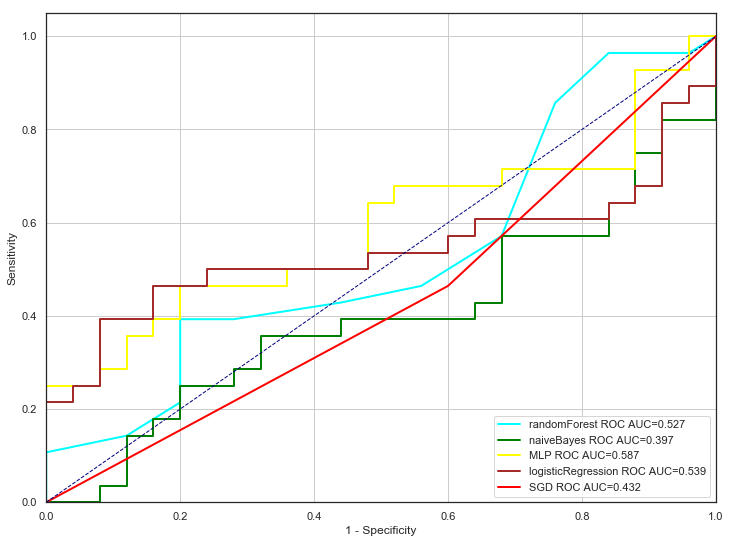

In [206]:
### render ROC curver for each classifier

np.random.seed(42)

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib
import matplotlib.pyplot as plt

# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_prediction_proba = nb_clf.predict_proba(X_test)[:, 1]

# Ranodm Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)
rf_prediction_proba = rf_clf.predict_proba(X_test)[:, 1]

# Multi-layer Perceptron Classifier
mlp_clf = MLPClassifier(alpha=1, hidden_layer_sizes=150)
mlp_clf.fit(X_train, y_train)
mlp_prediction_proba = mlp_clf.predict_proba(X_test)[:, 1]

## logistic regression
LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)
LR_prediction_proba = LR_clf.predict_proba(X_test)[:, 1]

## SGD classifier
sgd_clf = SGDClassifier(loss='log')
sgd_clf.fit(X_train, y_train)
sgd_prediction_proba = sgd_clf.predict_proba(X_test)[:, 1]

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(12, 9))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, rf_prediction_proba)
plt.plot(fpr, tpr, color='cyan', lw=2,
         label='randomForest ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, nb_prediction_proba)
plt.plot(fpr, tpr, color='green', lw=2,
         label='naiveBayes ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, mlp_prediction_proba)
plt.plot(fpr, tpr, color='yellow', lw=2,
         label='MLP ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, LR_prediction_proba)
plt.plot(fpr, tpr, color='brown', lw=2,
         label='logisticRegression ROC AUC={0:.3f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, sgd_prediction_proba)
plt.plot(fpr, tpr, color='red', lw=2,
         label='SGD ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [ ]:
### feature importance for classification

Feature ranking list for selecting best features:
1. feature 6 (0.129306)
2. feature 8 (0.120427)
3. feature 7 (0.120251)
4. feature 2 (0.115024)
5. feature 3 (0.112336)
6. feature 5 (0.107045)
7. feature 0 (0.103442)
8. feature 4 (0.096887)
9. feature 1 (0.095283)


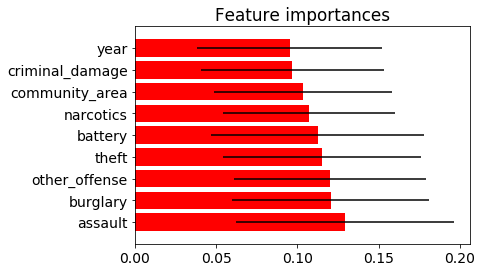

In [189]:
from sklearn.ensemble import RandomForestClassifier

randF = RandomForestClassifier(n_estimators=250,
                              random_state=0)

randF = randF.fit(X_train, y_train)
importances = randF.feature_importances_
std = np.std([tree.feature_importances_ for tree in randF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking list for selecting best features:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# dat = crime_finalDF.iloc[:, 2:11]
# dat =  dat.assign(pr_rate=crime_finalDF['price_change'])
features = crime_finalDF.columns
    
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

### Regression analysis

As we stated in project proposal, we want to investigate the relationship between crime frequncies in Chicago and house sale trend. To capture the such relationship, we are going to build up regression models. To do so, we come up following pipeline.


In [55]:
### mapping community name to chicago crime data
crimes_2012['Date'] = pd.to_datetime(crimes_2012['Date'], format='%m/%d/%Y %H:%M:%S %p')
top_occured_crimes = ['theft','battery', 'criminal_damage', 'narcotics', 'assault', 'other_offense',
                        'burglary', 'deceptive_practice', 'motor_vehicle_theft', 'robbery']
df = crimes_2012[crimes_2012['Primary Type'].isin(top_occured_crimes)]
chicago_crime = (pd.crosstab(index=df['Community Area'],
                        columns=[df['Date'].dt.year, df['Primary Type']]).sort_index(axis=1, level=[1, 0]))
chicago_crime.columns = ['{}_{}'.format(crime, year) for year, crime in chicago_crime.columns]
chicago_crime.reset_index(inplace=True)
chicago_crime['community_name'] = df['Community Area'].map(area_name_dic)
chicago_crime.drop('Community Area', axis=1, inplace=True)

### mapping neighbordhood to real estate data
house_df = pd.read_excel('real_eastate_data_main.xlsx')
house_df.columns=house_df.columns.astype(str)
# house_df.columns=house_df.columns.astype(str)
house_df=house_df.set_index('Region')
house_df.columns=pd.to_datetime(house_df.columns)
house_ann= house_df.T.groupby(house_df.columns.year).agg('mean').T
# house_ann.reset_index(inplace=True)
house_ann.reset_index(inplace=True)
house_ann =  house_ann.rename(columns={2012: 'Avg_Price_2012', 2013: 'Avg_Price_2013', 
                                       2014: 'Avg_Price_2014', 2015: 'Avg_Price_2015',
                                      2016: 'Avg_Price_2016', 2017: 'Avg_Price_2017', 
                                       2018: 'Avg_Price_2018', 2019: 'Avg_Price_2019'})

###
regions = []
for r in house_df.index:
    if '-' in r:
        index = r.find('-')
        new_reg = r[index+2:]
        regions.append(new_reg)
    else:
        regions.append(r)
        
house_ann['Area_Name'] = regions

###
code = []
for row in house_ann.itertuples(index=True,name='Pandas'):
    #convert neighborhoods to community areas
    comm_area = None
    if row.Area_Name in neighborhood_name_dic.keys():
        comm_area = neighborhood_name_dic[row.Area_Name]
    else:
        comm_area = row.Area_Name
    
    if comm_area in area_toCode_dic.keys():
        code.append(area_toCode_dic[comm_area])
    else:
        code.append(None)
        
##
house_ann['community_area'] = code
house_ann.drop(['Avg_Price_2017', 'Avg_Price_2018', 'Avg_Price_2019'], axis=1, inplace=True)
##
crime_finalDF = pd.merge(chicago_crime, house_ann, left_on='community_name', right_on='Area_Name')
crime_finalDF.dropna()
crime_finalDF.drop(['Region', 'community_name', 'community_area'], 1, inplace=True)
crime_finalDF.head(10)

,assault_2012,assault_2013,assault_2014,assault_2015,assault_2016,battery_2012,battery_2013,battery_2014,battery_2015,battery_2016,...,theft_2013,theft_2014,theft_2015,theft_2016,Avg_Price_2012,Avg_Price_2013,Avg_Price_2014,Avg_Price_2015,Avg_Price_2016,Area_Name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14.563636,16.333333,19.700000,21.750000,26.475000,North Lawndale
1,340,303,257,234,227,991,866,776,666,724,...,1004,811,845,851,38.063636,42.183333,50.325000,50.891667,68.975000,Woodlawn
2,244,277,210,233,241,736,667,593,661,653,...,1134,952,879,968,33.781818,42.591667,51.466667,56.958333,63.708333,Austin
3,124,111,85,99,93,354,352,319,288,288,...,689,507,499,514,33.781818,42.591667,51.466667,56.958333,63.708333,Austin
4,236,192,182,198,208,533,506,444,459,475,...,719,667,540,555,33.781818,42.591667,51.466667,56.958333,63.708333,Austin
5,51,50,47,69,60,181,149,114,172,130,...,357,257,219,209,33.781818,42.591667,51.466667,56.958333,63.708333,Austin
6,68,52,54,53,58,196,149,133,136,115,...,675,536,518,450,36.636364,41.425000,45.766667,47.800000,53.766667,Chatham
7,128,115,90,122,121,348,271,235,240,271,...,488,414,401,486,36.636364,41.425000,45.766667,47.800000,53.766667,Chatham
8,245,200,186,208,188,977,902,686,758,802,...,2656,2152,2149,2032,60.054545,93.525000,88.975000,100.133333,124.033333,Douglas
9,36,49,46,34,46,130,115,98,113,123,...,295,270,243,289,60.054545,93.525000,88.975000,100.133333,124.033333,Douglas


### Regression model for house sale price growth


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
import pandas as pd

In [57]:
#calculate price change between 2016 and 2012
# crime_finalDF=crime_finalDF.iloc[1:]
crime_finalDF['price_change'] = crime_finalDF['Avg_Price_2016'] - crime_finalDF['Avg_Price_2012']
crime_finalDF.drop(['Avg_Price_2012','Avg_Price_2013','Avg_Price_2014','Avg_Price_2015','Avg_Price_2016'],axis = 1,inplace = True)

#split years if they are data over time
crime_finalDF.columns =  pd.MultiIndex.from_tuples([(x.split('_20')[1] if '_20' in x else x ,x.split('_20')[0]) for x in crime_finalDF.columns])
crime_finalDF = crime_finalDF.groupby(level=[1],axis = 1).sum(axis = 1)
price_growth = crime_finalDF['price_change']

##
#create dummy variable from area name
dummy_df = pd.get_dummies(crime_finalDF['Area_Name'])
crime_finalDF.drop(['Area_Name','price_change'],axis = 1,inplace = True)

#scales crime variables
scaler = StandardScaler()
crime_finalDF[crime_finalDF.columns] = scaler.fit_transform(crime_finalDF)
crime_finalDF = pd.merge(crime_finalDF,dummy_df,left_index = True, right_index = True)
crime_finalDF.head(10)

,assault,battery,burglary,criminal_damage,deceptive_practice,motor_vehicle_theft,narcotics,other_offense,robbery,theft,...,North Lawndale,Norwood Park,Rogers Park,Roseland,South Shore,Uptown,Washington Park,West Englewood,West Garfield Park,Woodlawn
0,-1.279803,-1.188204,-1.269918,-1.472661,-0.906502,-1.354481,-0.678532,-1.420016,-1.132231,-0.975814,...,1,0,0,0,0,0,0,0,0,0
1,0.321178,0.348232,-0.110083,0.272590,0.007731,-0.307333,-0.042108,0.465850,0.042000,0.028467,...,0,0,0,0,0,0,0,0,0,1
2,0.137671,0.075928,-0.376858,-0.103287,0.393181,0.152167,0.273168,0.142167,-0.114895,0.186585,...,0,0,0,0,0,0,0,0,0,0
3,-0.677524,-0.576761,-0.379398,-0.460447,-0.264408,-0.541660,-0.503278,-0.561432,-0.768897,-0.336285,...,0,0,0,0,0,0,0,0,0,0
4,-0.084655,-0.265120,-0.472134,0.077633,-0.430985,0.543933,-0.271564,-0.372160,-0.578972,-0.281153,...,0,0,0,0,0,0,0,0,0,0
5,-0.953961,-0.903297,-0.749072,-0.842562,-0.698282,-0.594750,-0.565611,-1.056558,-0.772200,-0.690231,...,0,0,0,0,0,0,0,0,0,0
6,-0.944550,-0.909790,-0.304447,-0.664762,-0.375782,-0.622210,-0.584582,-0.986609,-0.806881,-0.345326,...,0,0,0,0,0,0,0,0,0,0
7,-0.602239,-0.666893,-0.301907,-0.253013,-0.219859,-0.611226,-0.323056,-0.597092,-0.768897,-0.460662,...,0,0,0,0,0,0,0,0,0,0
8,-0.071715,0.387188,1.421966,0.865258,1.514667,0.835011,-0.287373,-0.000473,1.133655,1.640520,...,0,0,0,0,0,0,0,0,0,0
9,-1.031598,-0.967077,-0.628388,-1.026601,-0.680849,-0.951732,-0.596326,-1.059301,-0.942306,-0.661783,...,0,0,0,0,0,0,0,0,0,0


## Run regression


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

### load dependencies
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [106]:
regModel = LinearRegression()
#split to training testing
X_feat = crime_finalDF.sample(frac=0.8,random_state=200)
y_label = price_growth[X_feat.index]
X_test = crime_finalDF.drop(X_feat.index)
regModel.fit(X_feat, y_label)
prediction = regModel.predict(X_test)
r2_score = r2_score(price_growth.drop(X_feat.index),regModel.predict(X_test))
print(r2_score)

0.7355837132941527


In [107]:
# scores = cross_val_score(LinearRegression(), X_feat, y_label, cv=5, scoring='r2')
lrmse = np.sqrt(-cross_val_score(regModel, X_feat, y_label, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of linear regression:",lrmse)

Root mean square of linear regression: 19.92919965829924


In [108]:
## LASSO regressor
lassoregr = LassoCV(alphas=[0.1,0.001,0.0001,1,2,3,4,5,6,7,8,9,10,11,12]).fit(X_feat, y_label)
y_lasso = lassoregr.predict(X_test)
rmse = np.sqrt(-cross_val_score(lassoregr, X_feat, y_label, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of Lasso regression", rmse)

Root mean square of Lasso regression 26.282396284015327


In [109]:
### Ridge regressor
ridgeregr = RidgeCV(alphas=[0.1,0.001,0.0001,1,2,3,4,5,6,7,8,9,10,11,12]).fit(X_feat, y_label)
y_ridge = ridgeregr.predict(X_test)
# Root mean squre with Ridge Regression
ridgermse = np.sqrt(-cross_val_score(ridgeregr, X_feat, y_label, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of rigde:",ridgermse)

Root mean square of rigde: 19.930844867910572


In [111]:
### GBR regressor
ensemble_reg = GradientBoostingRegressor(n_estimators = 80, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')
ensemble_reg.fit(X_feat, y_label)
ensemble_reg.predict(X_test)
GBRrmse = np.sqrt(-cross_val_score(ensemble_reg, X_feat, y_label, scoring="neg_mean_squared_error", cv = 5)).mean()
print("Root mean square of GBR:",GBRrmse)

Root mean square of GBR: 30.52921850341508


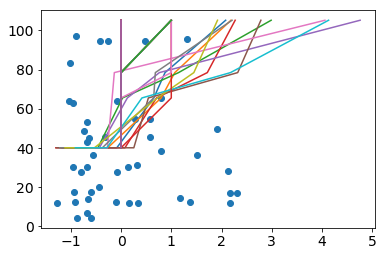

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
prediction=regModel.predict(np.sort(X_test, axis=0))
plt.scatter(X_feat.iloc[:,0], y_label)
plt.plot(np.sort(X_test, axis=0),prediction)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(max_depth = 3)
model_2.fit(X_feat,y_label)
pred = model_2.predict(X_test)
pred

array([31.89584257, 31.89584257, 31.89584257, 31.89584257, 31.89584257,
       31.89584257, 31.89584257, 31.89584257, 31.89584257, 31.89584257,
       95.76439394, 31.89584257])

#### feature selection

In [53]:
###
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

def feature_selection(X, y, 
                       init_arr=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    found = list(init_arr)
    while True:
        changed=False
        # forward step
        removed = list(set(X.columns)-set(found))
        new_pval = pd.Series(index=removed)
        for new_column in removed:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[found+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            found.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[found]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            found.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return found

result = feature_selection(X_feat, y_label)
print('resulting features:')
print(result)

Add  Humboldt Park                  with p-value 0.000109531
Add  Logan Square                   with p-value 0.00578293
Add  Avondale                       with p-value 0.00255431
Add  Lower West Side                with p-value 0.00658998
Add  Douglas                        with p-value 0.00613052
resulting features:
['Humboldt Park', 'Logan Square', 'Avondale', 'Lower West Side', 'Douglas']


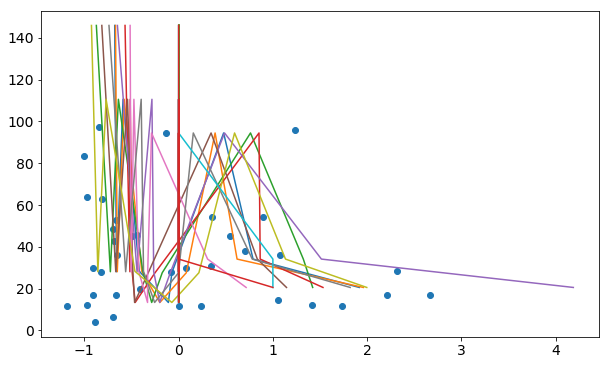

In [113]:
crimeCol = X_feat.iloc[:, 0:9]
areaCol = X_feat[['Humboldt Park', 'Logan Square', 'Avondale', 'Lower West Side', 'Douglas']]
selected_df = pd.concat([crimeCol, areaCol], axis=1)

### train regression model
regModel = LinearRegression()
X_ft = selected_df.sample(frac=0.8,random_state=200)
y_lab = price_growth[X_ft.index]
X_te = selected_df.drop(X_ft.index)
regModel.fit(X_ft, y_lab)
prediction = regModel.predict(X_te)

## scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_ft.iloc[:,1], y_lab)
plt.plot(np.sort(X_te, axis=0),prediction)
plt.show()
# r2_score(price_growth.drop(X_ft.index), prediction)
# print(r2_score)